# Emotion Recognition Project 
# Directed Studies In Biomedical Engineering 

In [7]:
print('hello and welcome to the program')

hello and welcome to the program


In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pyttsx3

In [47]:
#initiating viola jones face detector and defining fucntions for the program
haar_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#initiliazing the text to speech program
engine=pyttsx3.init()
voices=engine.getProperty('voices')
engine.setProperty('rate',200)
engine.setProperty('voice',voices[1].id)

#defining certain fucntions 
def detect_emotion(image_path):
    image=cv2.imread(image_path)
    image_copy=image.copy()
    image_copy=cv2.resize(image_copy,(400,400),interpolation=cv2.INTER_AREA)
    image=cv2.resize(image,(400,400),interpolation=cv2.INTER_AREA)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces=haar_cascade.detectMultiScale(image,scaleFactor=1.5,minNeighbors=3)
    for x,y,w,h in faces:
        face_roi=image[y:y+h,x:x+w]
        label,confidence=emotion_rec.predict(face_roi)
        if label==0:
            cv2.rectangle(image_copy,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(image_copy,'angry face',(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),3)
            engine.say('angry face detected')
            engine.runAndWait()
        elif label==1:
            cv2.rectangle(image_copy,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(image_copy,'disgust face',(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),3)
            engine.say('disgust face detected')
            engine.runAndWait()
        elif label==2:
            cv2.rectangle(image_copy,(x,y),(x+w,y+h),(255,0,0),3)
            cv2.putText(image_copy,'fear face',(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),3)
            engine.say('fear face detected')
            engine.runAndWait()
        elif label==3:
            cv2.rectangle(image_copy,(x,y),(x+w,y+h),(100,100,10),3)
            cv2.putText(image_copy,'happy face',(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(100,100,10),3)
            engine.say('happy face detected')
            engine.runAndWait()
        elif label==4:
            cv2.rectangle(image_copy,(x,y),(x+w,y+h),(200,100,200),3)
            cv2.putText(image_copy,'neutral face',(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(200,100,200),3)
            engine.say('neutral face detected')
            engine.runAndWait()
        elif label==5:
            cv2.rectangle(image_copy,(x,y),(x+w,y+h),(122,12,100),3)
            cv2.putText(image_copy,'sad face',(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(122,12,100),3)
            engine.say('sad face detected')
            engine.runAndWait()
        elif label==6:
            cv2.rectangle(image_copy,(x,y),(x+w,y+h),(20,100,20),3)
            cv2.putText(image_copy,'surprise face',(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(20,100,20),3)
            engine.say('surprise face detected')
            engine.runAndWait()
    
    plt.figure(figsize=(10,10)) 
    plt.imshow(cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB))
    plt.title(f'emotion is {emotions[label]}')
    plt.show()
    return label
      
def chat(x):
    engine.say('HI I\'m SAM a psychiatrist software, i really can tell emotions by just looking at faces')
    engine.runAndWait()
    print('HI I\'m SAM a psychiatrist software, i really can tell emotions by just looking at faces')
    emotion=input('tell me what you see in the image? lets see....')
    emos={'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}
    label_selected=emos[emotion]
    if  x==0:
        print('the person in the image is angry, what you think about that')
        if label_selected==0 and x==0:
            print('you see what i see too that\'s nice')
        else:
            print('I am really sure that this is angry face, you should tell my creator')
    elif x==1:
        print('the person in the image is disgust, what you think about that')
        if label_selected==1 and x==1:
              print('you see what i see too hahaha')
        else:
              print('I am really sure that we are not mathcing')
    elif x==2:
        print('the perosn in the image is afraid of something, not is your turn what you think')
        if label_selected==2 and x==2:
              print('you see what i see thats cool')
        else:
              print('you are teasing me, be carefull i am smarter than you')
    elif x==3:
        print('the person in the image is happy amazing :)')
        if label_selected==3 and x==3:
              print('you see what i see isn\'t cool that!')
        else:
              print('me or you or both are wrong')
    elif x==4:
        print('the person in the image is normal that is fine')
        if label_selected==4 and x==4:
            print('you see as i see now ok')
        else:
            print('you are not like me i am built different')
    elif x==5:
        print('the porson in the image is sad, i am really sory to see that')
        if label_selected==5 and x==5:
            print('ok we are both agreeing that this person is sad')
            print('what you think we should do')
        else:
            print('you sould really see a real doctor i am done hahaha')
    elif x==6:
        print('the person in the image is surprised wow!')
        if label_selected==6 and x==6:
            print('we should see what is going on with this person hahah')
        else:
            print('i am out of here')
            print('this is the second, third time we do not match')
    else:
        print('i am such a loser i really cant to detect emotion in this image.')

def program(image_path):
    """program function to chat and interact with the software"""
    ret=detect_emotion(image_path)
    chat(ret)

In [3]:
emotions=['angry','disgust','fear','happy','neutral','sad','surprise']
for emotion in emotions:
    print(emotion,'=>',emotions.index(emotion))

angry => 0
disgust => 1
fear => 2
happy => 3
neutral => 4
sad => 5
surprise => 6


In [4]:
#intiliazing the face emotion facial expression recognizier
emotion_rec=cv2.face.LBPHFaceRecognizer_create()
emotion_rec.read('emotion_recognizer.yml')

#reading in the features and labels arrays
emotion_features=np.load('emotion_features.npy',allow_pickle=True)
emotion_labels=np.load('emotion_labels.npy')

In [5]:
print(len(emotion_features))
print(len(emotion_labels))

700
700


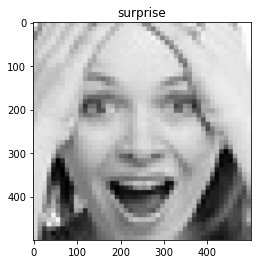

In [6]:
plt.imshow(emotion_features[600],cmap='gray')
plt.title(emotions[emotion_labels[600]])
plt.show()

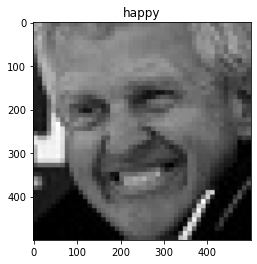

In [8]:
plt.imshow(emotion_features[333],cmap='gray')
plt.title(emotions[emotion_labels[333]])
plt.show()

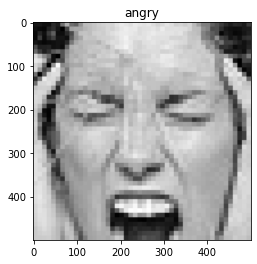

In [10]:
plt.imshow(emotion_features[50],cmap='gray')
plt.title(emotions[emotion_labels[50]])
plt.show()

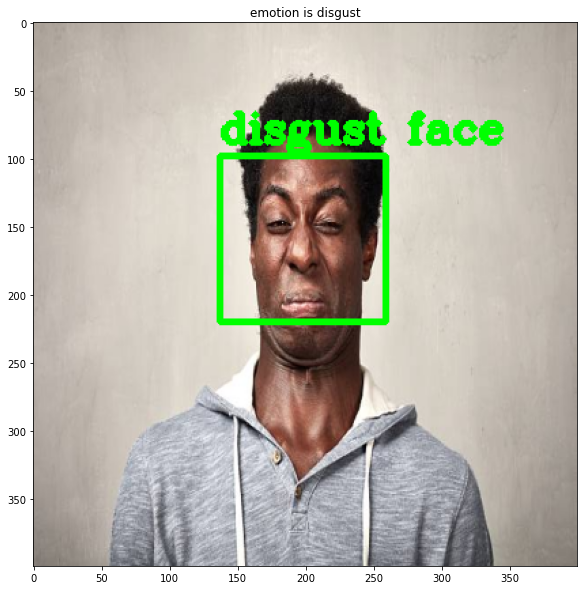

HI I'm SAM a psychiatrist software, i really can tell emotions by just looking at faces
tell me what you see in the image? lets see....fear
the person in the image is disgust, what you think about that
I am really sure that we are not mathcing


In [30]:
image=r'C:\Users\mohamed\Desktop\New folder\1000_F_141896813_Fusfw5jSwxA4V1vXbnzzrHa6idp2DmPJ.jpg'
image2=r'C:\Users\mohamed\Desktop\New folder\happy woman.jpg'
image3=r'C:\Users\mohamed\Desktop\New folder\disgust.jpg'
program(image3)

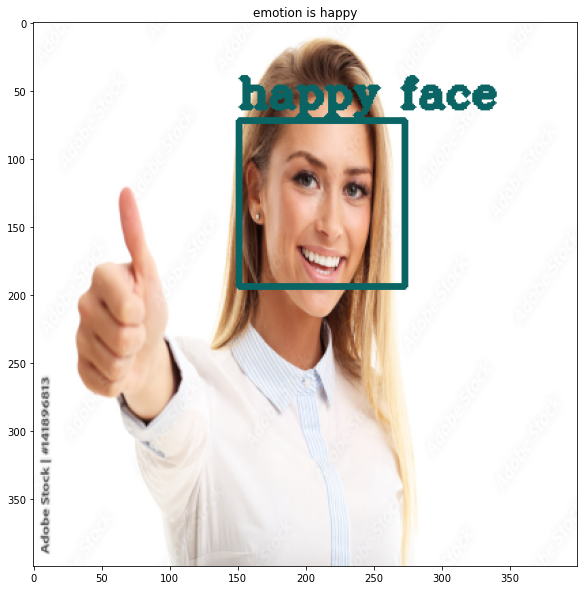

HI I'm SAM a psychiatrist software, i really can tell emotions by just looking at faces
tell me what you see in the image? lets see....sad
the person in the image is happy amazing :)
me or you or both are wrong


In [13]:
image=r'C:\Users\mohamed\Desktop\New folder\1000_F_141896813_Fusfw5jSwxA4V1vXbnzzrHa6idp2DmPJ.jpg'
image2=r'C:\Users\mohamed\Desktop\New folder\happy woman.jpg'
image3=r'C:\Users\mohamed\Desktop\New folder\disgust.jpg'
program(image)

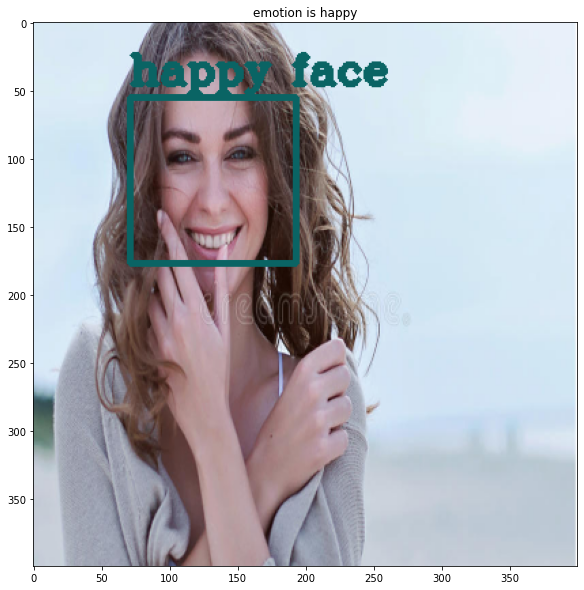

HI I'm SAM a psychiatrist software, i really can tell emotions by just looking at faces
tell me what you see in the image? lets see....disgust
the person in the image is happy amazing :)
me or you or both are wrong


In [14]:
program(image2)

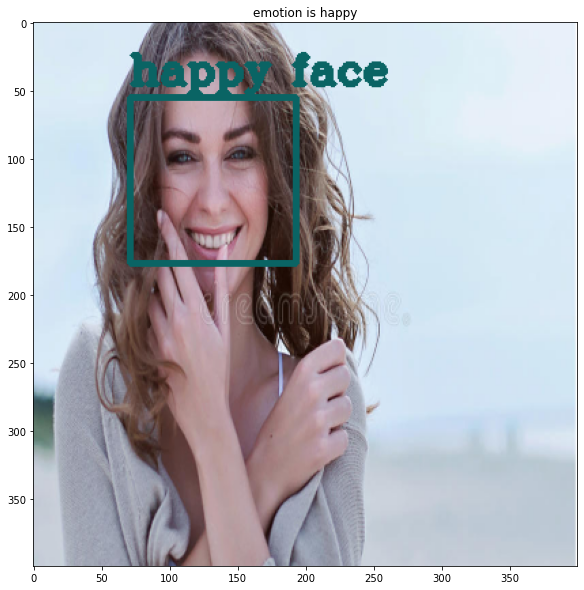

HI I'm SAM a psychiatrist software, i really can tell emotions by just looking at faces
tell me what you see in the image? lets see....happy
the person in the image is happy amazing :)
you see what i see isn't cool that!


In [15]:
program(image2)

True


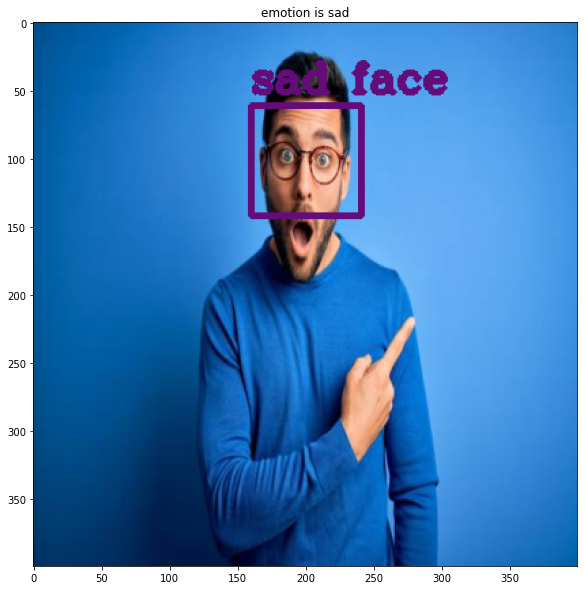

HI I'm SAM a psychiatrist software, i really can tell emotions by just looking at faces
tell me what you see in the image? lets see....sad
the porson in the image is sad, i am really sory to see that
ok we are both agreeing that this person is sad
what you think we should do


In [39]:
image4=r'C:\Users\mohamed\Desktop\New folder\surprise.jpg'
print(os.path.exists(image4))
program(image4)

True


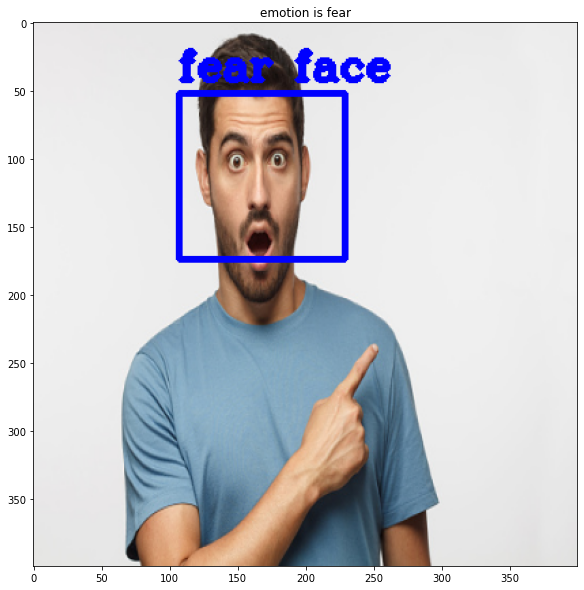

HI I'm SAM a psychiatrist software, i really can tell emotions by just looking at faces
tell me what you see in the image? lets see....surprise
the perosn in the image is afraid of something, not is your turn what you think
you are teasing me, be carefull i am smarter than you


In [40]:
image5=r'C:\Users\mohamed\Desktop\New folder\surprise3.jpg'
print(os.path.exists(image5))
program(image5)

In [55]:
# image5=r'C:\Users\mohamed\Desktop\New folder\small girl.jpg'
# print(os.path.exists(image5))
# program(image5)

# real time video stream

In [56]:
# def detect_emotion(image):
#     """function for detecting emotion from faces
#     input:-->image_path
#     output:-->label + rectangle bounding box
#     """
#     image_copy=image.copy()
#     image_copy=cv2.resize(image_copy,(500,500),interpolation=cv2.INTER_AREA)
#     image=cv2.resize(image,(500,500),interpolation=cv2.INTER_AREA)
#     image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#     faces=haar_cascade.detectMultiScale(image,scaleFactor=1.1,minNeighbors=1)
#     for x,y,w,h in faces:
#         face_roi=image[y:y+h,x:x+w]
#         label,confidence=emotion_rec.predict(face_roi)
#         if label==0:
#             cv2.rectangle(image_copy,(x,y),(x+w,y+h),(0,0,255),3)
#             cv2.putText(image_copy,'angry face',(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),3)
#         elif label==1:
#             cv2.rectangle(image_copy,(x,y),(x+w,y+h),(0,255,0),3)
#             cv2.putText(image_copy,'disgust face',(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),3)
#         elif label==2:
#             cv2.rectangle(image_copy,(x,y),(x+w,y+h),(255,0,0),3)
#             cv2.putText(image_copy,'fear face',(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),3)
#         elif label==3:
#             cv2.rectangle(image_copy,(x,y),(x+w,y+h),(100,100,10),3)
#             cv2.putText(image_copy,'happy face',(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(100,100,10),3)
#         elif label==4:
#             cv2.rectangle(image_copy,(x,y),(x+w,y+h),(200,100,200),3)
#             cv2.putText(image_copy,'neutral face',(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(200,100,200),3)
#         elif label==5:
#             cv2.rectangle(image_copy,(x,y),(x+w,y+h),(122,12,100),3)
#             cv2.putText(image_copy,'sad face',(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(122,12,100),3)
#         elif label==6:
#             cv2.rectangle(image_copy,(x,y),(x+w,y+h),(20,100,20),3)
#             cv2.putText(image_copy,'surprise face',(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(20,100,20),3)

#     return image_copy
      

In [57]:
# emotions=['angry','disgust','fear','happy','neutral','sad','surprise']

# #defining the viola jones haar cascade classifier face detection algorithm to detect faces from image
# haar_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# cap=cv2.VideoCapture(0)
# cap.set(3,640)
# cap.set(4,480)

# while cap.isOpened():
#     success,frame=cap.read()
#     if not success:
#         break
#     if frame is None:
#         break
    
#     image=detect_emotion(frame)
#     cv2.imshow(f'program video stream',image)
#     if cv2.waitKey(1) & 0xFF==ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()